# Leren: Programming assignment 3
** This assignment can be done in teams of 2 **

**Student 1:**  <span style="color:red">Tycho Koster</span> (<span style="color:red">10667687</span>)<br>
**Student 2:** <span style="color:red">David Stap</span> (<span style="color:red">10608516</span>)<br>

-----------------------------------
This notebook provides a template for your programming assignment 3. You may want to use parts of your code from the previous assignment(s) as a starting point for this assignment. 

The code you hand-in should follow the structure from this document. Each part of the assignment has its own cell, you are free to add more cells. Note that the structure corresponds with the structure from the actual programming assignment. Make sure you read this for the full explanation of what is expected of you.

**Submission:**

* Make sure your code can be run from top to bottom without errors.
* Include your data files in the zip file.
* Comment your code

One way be sure you code can be run without errors is by quiting iPython completely and then restart iPython and run all cells again (you can do this by going to the menu bar above: Cell > Run all). This way you make sure that no old definitions of functions or values of variables are left (that your program might still be using).

-----------------------------------

If you have any questions ask your teaching assistent. We are here for you.

-----------------------------------

## Regularized Logistic Regression
a) Implementation

In [371]:
import math
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt

# add data
# X1  X2  X3  Y
# 10  4   4   0
# 7   3   3   0 
# 5   4   2   1
# 2   3   1   1
def read_logistic_data():
    x = []
    y= []
    y.append(0)
    y.append(0)
    y.append(1)
    y.append(1)
    x.append([10.0, 4.0, 4.0])
    x.append([7.0, 3.0, 3.0])
    x.append([5.0, 4.0, 2.0])
    x.append([2.0, 3.0, 1.0])    
    return x, y


def create_theta_array(x):
    theta = [0.5]
    for i in range(len(x)):
        theta.append(0.5)
    return theta


x, y = read_logistic_data()
theta_array = create_theta_array(x[0])

In [362]:
'''
gradient_function_logistic
Input: alpha (learning rate), theta_array (list of theta values), x (list of multiple features with values), y (list of values)
Output: gradient for every theta in array
'''

def gradient_function_logistic(alpha, theta_array, theta, x, y):
    m = len(x)
    totalsum = 0
    for i in range(0, len(x[0])):
        temp_x = []
        #temporary x for the values of all features at that specific index
        for j in range(len(x)):
            temp_x.append(x[j][i])
        if theta == 0:
            totalsum += (Hx_logistic(theta_array, temp_x) - y[i])
        else:
            totalsum += (Hx_logistic(theta_array, temp_x) - y[i])*x[theta-1][i]
    return (alpha*totalsum)/m
    
'''
Hx_logistic
Input: theta_array (list of theta values), x (list of values)
Output: prediction of y with logistic hypotheses calculations
'''
def Hx_logistic(theta_array, x):
    exponent = theta_array[0]
    for i in range(1, len(theta_array)):
        exponent += theta_array[i]*x[i-1]
    e = -exponent
    return 1.0/(1 + math.exp(e))

'''
update_theta_logistic
Input: alpha (learning rate), theta_array (list of theta values), x (list of multiple features with values), y (list of values),
iterations (number of iterations to be done)
Output: All values of theta after the amount of iterations with the use of logistic regression.
'''
def update_theta_logistic(alpha, theta_array, x, y, iterations):
    costs = []
    costs.append(cost(theta_array, x, y))
    for i in range(iterations):
        for j in range(len(theta_array)):
            theta_array[j] -= gradient_function_logistic(alpha, theta_array,j, x, y)
        costs.append(cost(theta_array, x, y))
    return theta_array, costs

def hypothesis(theta, training_example):
    totalsum = 0.0
    for i in range(len(theta[1:])):
        totalsum += theta[i]*training_example[i]
    # + theta_0 * 1
    totalsum+=theta[0]  
    return 1.0/(1 + math.exp(-totalsum))
    
    
def cost(theta, x, y):
    cost = 0.0
    for t in range(len(x)):
        if y[t] == 1:
            cost += math.log10(hypothesis(theta, x[t]))
        if y[t] == 0:
            cost += math.log10(1-hypothesis(theta, x[t]))
        
    return (-1.0/len(x)) * cost

In [384]:
update_theta_logistic(0.01, theta_array, x, y, 1)

([0.49502293901017974,
  0.46509236400983045,
  0.4750796202086097,
  0.4775725918897131],
 [1.7950707304149853, 1.7399201079007602])

In [378]:
def update_theta(alpha, theta, x, y, iterations):
    
    errors = []
    for t in range(len(x)):
        errors.append(hypothesis(theta, x[t]) - y[t])
    
    
    
    
    return errors
    
    
    

In [379]:
update_theta(0.01, theta_array, x, y, 5)

[0.9999251537724895,
 0.9990889488055994,
 -0.002472623156634657,
 -0.02931223075135636]

In [381]:
print hypothesis(theta_array, x[0])
print hypothesis(theta_array, x[1])
print hypothesis(theta_array, x[2])
print hypothesis(theta_array, x[3])

0.999925153772
0.999088948806
0.997527376843
0.970687769249


In [382]:
x1 = hypothesis(theta_array, x[0])
x2 = hypothesis(theta_array, x[1])
x3 = hypothesis(theta_array, x[2])-1
x4 = hypothesis(theta_array, x[3])-1

print 0.5 - 0.01 * (1/4.0)*(x1+x2+x3+x4)

0.495081926878


b) Two small datasets

**Discussion:**

[You discussion comes here]

-----------------------------------

## 2) Neural Network


In [370]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

def sigmoid_derivative(z):
    return z*(1-z)

a) Forward Propagation

In [602]:
'''
Input: 
- Input value(s) X
- List with weights for hidden layer(s) W
- Weights for final layer W_output (can be of a different dimension than
  W, because n of output values can be different than n of nodes in 
  hidden layers)
Output: 
- activation value(s) of y 
'''
def forward(X, W, W_output):    
    steps = list()
    steps.append(X)    
    # loop over weights for hidden layers
    for i in range(len(W)):
        steps.append(sigmoid(np.dot(steps[i], W[i])))    
    # for final value, use W_output
    steps.append(sigmoid(np.dot(steps[-1], W_output)))
    
    return steps, steps[-1]
  
    
#example run: calculate activation of Y for neural network in written3
X = np.array([[-5]])
W = np.array([[0.2]])
W_output = np.array([[0.1]])

steps, result = forward(X, W, W_output)
print 'intermediate steps: ', steps
print 'Y activation: ', result

intermediate steps:  [array([[-5]]), array([ 0.26894142]), array([ 0.50672313])]
Y activation:  [ 0.50672313]


In [603]:
# more fancy example run: calculate activation of y where:

inputLayerSize = 10
outputLayerSize = 3
hiddenLayerSize = 35
hiddenLayerDepth = 1

def random_weights(inputLayerSize, outputLayerSize, hiddenLayerSize, hiddenLayerDepth):    
    # create random weight values for all hidden layers
    W = list()
    W.append(np.random.randn(inputLayerSize, hiddenLayerSize))
    if hiddenLayerSize > 1:
        for i in range(hiddenLayerDepth):
            W.append(np.random.randn(hiddenLayerSize, hiddenLayerSize))

    # W_output might have different dimensions 
    # (if outputLayerSize != hiddenLayerSize)
    W_output = np.random.randn(hiddenLayerSize, outputLayerSize)
    
    return W, W_output

X = np.array([0,0,0,12,13,5,0,0,0,0])

W, W_output = random_weights(len(X), outputLayerSize, hiddenLayerSize, hiddenLayerDepth)

steps, result = forward(X, W, W_output)
print 'Y activation: ', result

Y activation:  [ 0.00074474  0.45844378  0.62710019]


b) Backpropagation on two logistic units

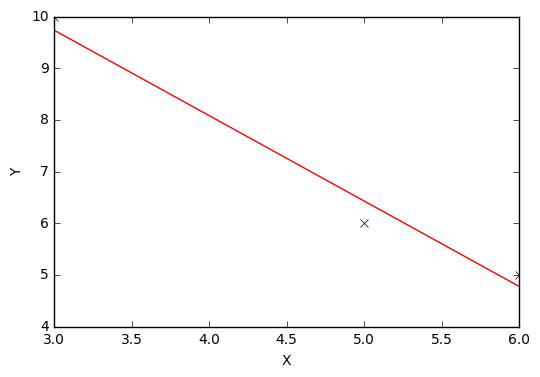

weights:  [ 14.69321372  -1.65275945]


In [500]:
'''
backpropagation for data from written assignment 1:
X  |  6  5  3
Y  |  5  6  10

Input:
- X (training examples + added row of ones for bias unit)
- y (y values)
- w (list with weights)
- alpha (learning rate)
- number of iterations
Output:
- weights after iterations
'''
def error_backpropagation(X, y, w, alpha, iterations):
    for t in range(iterations):
        grad = np.array([0., 0.])
        # loop through training examples
        for i in range(len(X)):
            x_i = X[i, :]
            y_i = y[i]
            h = np.dot(w, x_i)-y_i
            grad += 2*x_i*h

        # update weights
        w = w - alpha * grad

    plot(X, y, w) 
    return w

def plot(X, y, w):   
    tt = np.linspace(np.min(X[:, 1]), np.max(X[:, 1]), 10)
    bf_line = w[0]+w[1]*tt
    plt.plot(X[:, 1], y, 'kx', tt, bf_line, 'r-')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()
    
    
X = np.array([[1,6], [1,5], [1,3]])
y = np.array([5,6,10])
w = np.array([0.5, 0.5])

weights = error_backpropagation(X, y, w, 0.001, 10000)
print "weights: ", weights

In [501]:
'''
backpropagation for written3 assignment 3.3

Input:
- X (training examples)
- y (y values)
- W (list with weights for hidden layers)
- W_output (weights for final hidden layer)
- alpha (learning rate)
- number of iterations
'''
def backpropagation_written3_3_3(X, y, W, W_output, alpha, iterations):
    steps, result = forward(X, W, W_output)
    if iterations > 0:

        print 'current output: ', result
        ### LAST WEIGHTS
        d_2 = result - y

        ### MIDDLE WEIGHTS
        d_1 = W_output * d_2 * sigmoid_derivative(steps[-2])    
        dy_dtheta2 = steps[-2] * d_2

        # FIRST WEIGHTS
        dy_dtheta1 = X[0] * d_1

        ### UPDATE WEIGHTS
        W_updated = W - alpha * dy_dtheta1
        W_output_updated = W_output - alpha * dy_dtheta2

        steps, result = forward(X, W_updated, W_output_updated)
        print 'new output: ', result
        print '---------------'
        
        backpropagation_written3_3_3(X, y, W_updated, W_output_updated, alpha, iterations-1)


X = np.array([[-5]])
y = np.array([[1]])
W = np.array([[0.2]])
W_output = np.array([[0.1]])

backpropagation_written3_3_3(X, y, W, W_output, 0.7, 5)    

current output:  [ 0.50672313]
new output:  [ 0.51463352]
---------------
current output:  [ 0.51463352]
new output:  [ 0.52818891]
---------------
current output:  [ 0.52818891]
new output:  [ 0.55496235]
---------------
current output:  [ 0.55496235]
new output:  [ 0.60284722]
---------------
current output:  [ 0.60284722]
new output:  [ 0.66075745]
---------------


c) Complete backpropagation on handwritten digit recognition

In [675]:
from numpy import genfromtxt

# import X and y from csv file
def read_logistic_data():
    my_data = genfromtxt('digits123.csv', delimiter=',')
    X = []
    y= []
    for i in range(len(my_data)):
        new_data = my_data[i]
        y.append([new_data[-1]])
        X.append(np.delete(new_data, -1))
    return X, y

X, temp_y = read_logistic_data()

'''
for this specific handwritten digit classification problem, we need to have 
three classes: 1, 2, 3. Representation of the classes will be as follows:

class '1' =   class '2' =   class '3' =
[1,           [0,           [0,
 0,            1,            0,
 0]            0]            1]
'''
y = []

for i in range(len(temp_y)):
    if temp_y[i][0] == 1.0:
        y.append(np.array([[1, 0, 0]]))        
    if temp_y[i][0] == 2.0:
        y.append(np.array([[0, 1, 0]]))      
    if temp_y[i][0] == 3.0:
        y.append(np.array([[0, 0, 1]]))

In [684]:
# chosen parameters for neural network:
inputLayerSize = 64   # 64 features
outputLayerSize = 3   # three classes: 1, 2, 3
hiddenLayerSize = 35  # simple rule of thumb: n of neurons in hidden layer
                      # is mean of inputLayerSize and outPutlayerSize.
hiddenLayerDepth = 1

# create random weights for NN using above parameters
W, W_output = random_weights(inputLayerSize, outputLayerSize, hiddenLayerSize, hiddenLayerDepth)



steps, result = forward(X[0], W, W_output)

print result


[ 0.37136759  0.97767139  0.85072009]


In [685]:
result-y[0]

array([[-0.62863241,  0.97767139,  0.85072009]])

In [688]:
#backpropagation_written3_3_3(X, y, W, W_output, alpha, iterations)

backpropagation_written3_3_3(X[0], y[0], W, W_output, 0.01, 1)

current output:  [ 0.37136759  0.97767139  0.85072009]


ValueError: operands could not be broadcast together with shapes (35,3) (35,) 